In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos
df = pd.read_csv('C:\\Users\\PC\\Documents\\US_Regional_Sales_Data.csv')

# Convertir las fechas al formato adecuado
date_columns = ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format='%d/%m/%y')

# Convertir las columnas 'Unit Cost' y 'Unit Price' a tipo numérico
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'].str.replace(',', ''), errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'].str.replace(',', ''), errors='coerce')

# Codificar la variable categórica 'Sales Channel'
le = LabelEncoder()
df['Sales Channel'] = le.fit_transform(df['Sales Channel'])

# One-hot encoding para las columnas 'WarehouseCode' y 'CurrencyCode'
df = pd.get_dummies(df, columns=['WarehouseCode', 'CurrencyCode'])

# Extraer características útiles de las fechas
for column in date_columns:
    df[column + '_day'] = df[column].dt.day
    df[column + '_month'] = df[column].dt.month
    df[column + '_year'] = df[column].dt.year
    df[column + '_dayofweek'] = df[column].dt.dayofweek

# Eliminar las columnas originales de fecha
df = df.drop(date_columns, axis=1)

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['OrderNumber', 'Sales Channel'], axis=1)
y = df['Sales Channel']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Máquinas de Soporte Vectorial (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.2f}')



SVM Accuracy: 0.96


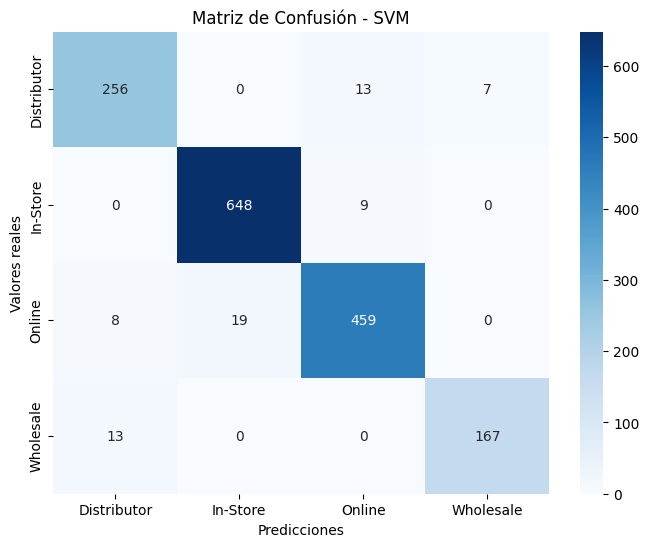

Informe de Clasificación:
               precision    recall  f1-score   support

 Distributor       0.92      0.93      0.93       276
    In-Store       0.97      0.99      0.98       657
      Online       0.95      0.94      0.95       486
   Wholesale       0.96      0.93      0.94       180

    accuracy                           0.96      1599
   macro avg       0.95      0.95      0.95      1599
weighted avg       0.96      0.96      0.96      1599



C:\Users\PC\AppData\Local\Temp\ipykernel_12000\1241716007.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Comparación', data=df_compare, palette='Set2')


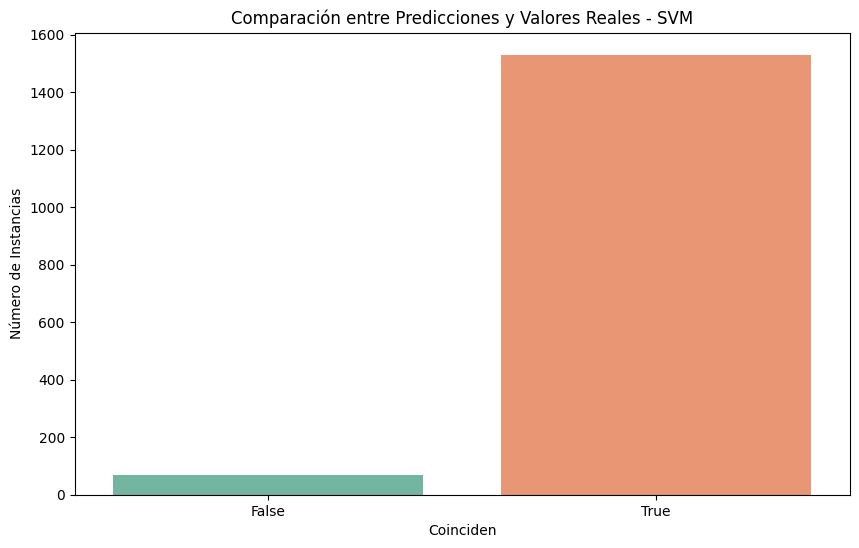

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión - SVM')
plt.show()

# Imprimir el informe de clasificación
class_report = classification_report(y_test, svm_predictions, target_names=le.classes_)
print('Informe de Clasificación:\n', class_report)

# Generar un gráfico de barras para comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
df_compare = pd.DataFrame({'Real': le.inverse_transform(y_test), 'Predicción': le.inverse_transform(svm_predictions)})
df_compare['Comparación'] = df_compare['Real'] == df_compare['Predicción']
sns.countplot(x='Comparación', data=df_compare, palette='Set2')
plt.title('Comparación entre Predicciones y Valores Reales - SVM')
plt.xlabel('Coinciden')
plt.ylabel('Número de Instancias')
plt.show()


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


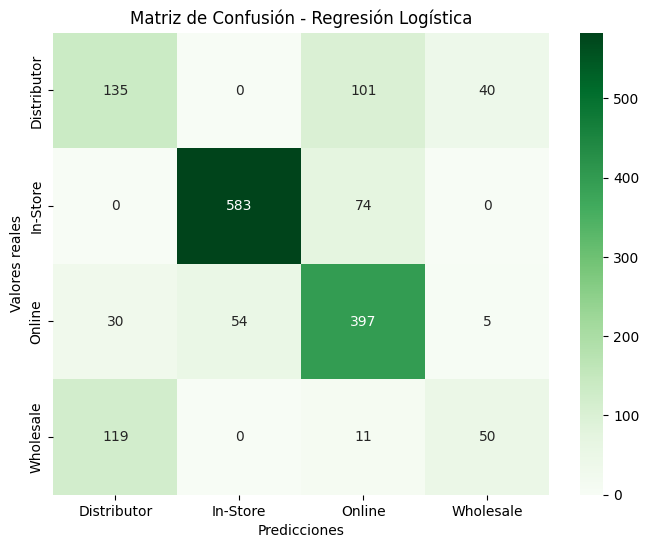

Informe de Clasificación - Regresión Logística:
               precision    recall  f1-score   support

 Distributor       0.48      0.49      0.48       276
    In-Store       0.92      0.89      0.90       657
      Online       0.68      0.82      0.74       486
   Wholesale       0.53      0.28      0.36       180

    accuracy                           0.73      1599
   macro avg       0.65      0.62      0.62      1599
weighted avg       0.72      0.73      0.72      1599



C:\Users\PC\AppData\Local\Temp\ipykernel_12000\3805700086.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Comparación', data=df_compare_logistic, palette='Set2')


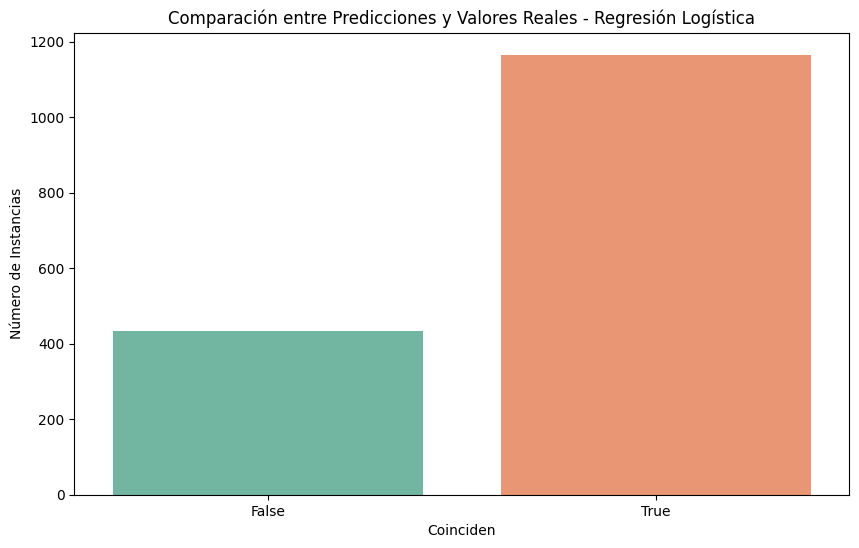

In [25]:
from sklearn.linear_model import LogisticRegression

# Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Calcular la matriz de confusión para Regresión Logística
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Visualizar la matriz de confusión para Regresión Logística
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Imprimir el informe de clasificación para Regresión Logística
logistic_class_report = classification_report(y_test, logistic_predictions, target_names=le.classes_)
print('Informe de Clasificación - Regresión Logística:\n', logistic_class_report)

# Generar un gráfico de barras para comparar las predicciones de Regresión Logística con los valores reales
plt.figure(figsize=(10, 6))
df_compare_logistic = pd.DataFrame({'Real': le.inverse_transform(y_test), 'Predicción': le.inverse_transform(logistic_predictions)})
df_compare_logistic['Comparación'] = df_compare_logistic['Real'] == df_compare_logistic['Predicción']
sns.countplot(x='Comparación', data=df_compare_logistic, palette='Set2')
plt.title('Comparación entre Predicciones y Valores Reales - Regresión Logística')
plt.xlabel('Coinciden')
plt.ylabel('Número de Instancias')
plt.show()


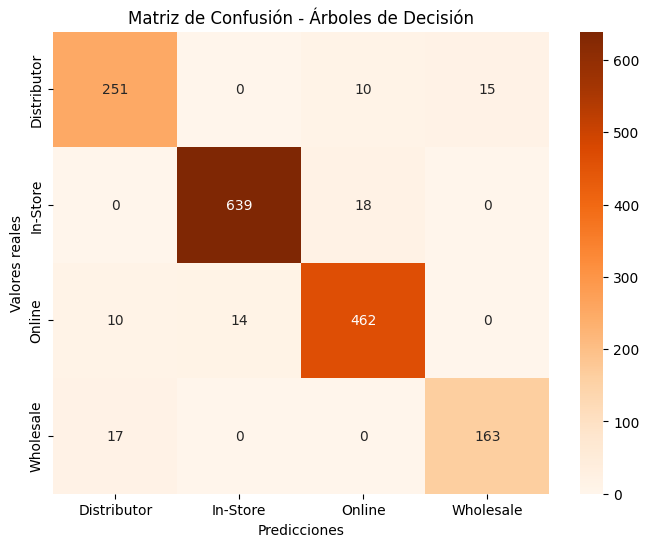

Informe de Clasificación - Árboles de Decisión:
               precision    recall  f1-score   support

 Distributor       0.90      0.91      0.91       276
    In-Store       0.98      0.97      0.98       657
      Online       0.94      0.95      0.95       486
   Wholesale       0.92      0.91      0.91       180

    accuracy                           0.95      1599
   macro avg       0.94      0.93      0.93      1599
weighted avg       0.95      0.95      0.95      1599



C:\Users\PC\AppData\Local\Temp\ipykernel_12000\3255910341.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Comparación', data=df_compare_decision_tree, palette='Set2')


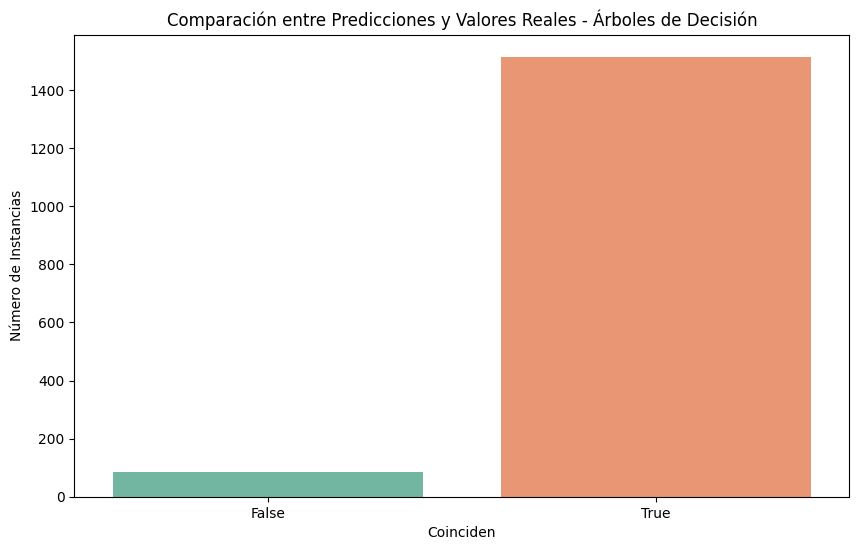

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Árboles de Decisión
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calcular la matriz de confusión para Árboles de Decisión
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)

# Visualizar la matriz de confusión para Árboles de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(decision_tree_conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión - Árboles de Decisión')
plt.show()

# Imprimir el informe de clasificación para Árboles de Decisión
decision_tree_class_report = classification_report(y_test, decision_tree_predictions, target_names=le.classes_)
print('Informe de Clasificación - Árboles de Decisión:\n', decision_tree_class_report)

# Generar un gráfico de barras para comparar las predicciones de Árboles de Decisión con los valores reales
plt.figure(figsize=(10, 6))
df_compare_decision_tree = pd.DataFrame({'Real': le.inverse_transform(y_test), 'Predicción': le.inverse_transform(decision_tree_predictions)})
df_compare_decision_tree['Comparación'] = df_compare_decision_tree['Real'] == df_compare_decision_tree['Predicción']
sns.countplot(x='Comparación', data=df_compare_decision_tree, palette='Set2')
plt.title('Comparación entre Predicciones y Valores Reales - Árboles de Decisión')
plt.xlabel('Coinciden')
plt.ylabel('Número de Instancias')
plt.show()


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

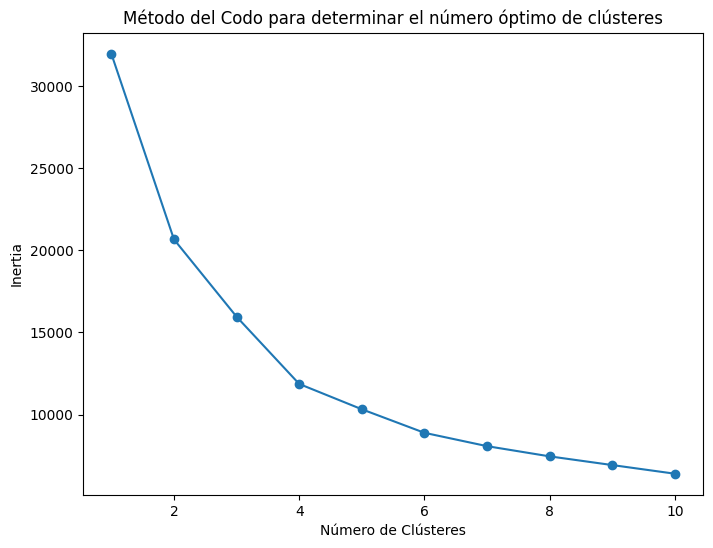

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\AppData\Local\Temp\ipykernel_964\1464083730.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Cluster'] = kmeans.fit_predict(product_data_scaled)


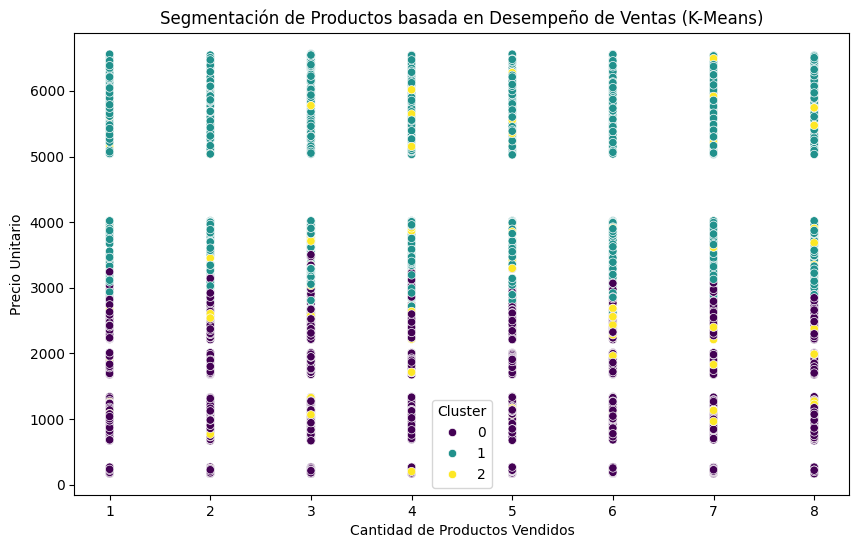

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:\\Users\\PC\\Documents\\US_Regional_Sales_Data.csv')

# Seleccionar las características para la segmentación
features = ['Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price']

# Limpiar las columnas numéricas y convertirlas a números
numeric_columns = ['Discount Applied', 'Unit Cost', 'Unit Price']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True), errors='coerce')

# Eliminar filas con valores nulos resultantes de la conversión
df = df.dropna(subset=numeric_columns)

# Crear un subconjunto del DataFrame con las características seleccionadas
product_data = df[features]

# Estandarizar las características para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_data)

# Determinar el número óptimo de clústeres usando el método del codo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(product_data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para determinar el número óptimo de clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inertia')
plt.show()

# Basándonos en la gráfica, seleccionar el número óptimo de clústeres (en este caso, supongamos que es 3)
num_clusters = 3

# Aplicar K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
product_data['Cluster'] = kmeans.fit_predict(product_data_scaled)

# Visualizar la segmentación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Quantity', y='Unit Price', hue='Cluster', data=product_data, palette='viridis')
plt.title('Segmentación de Productos basada en Desempeño de Ventas (K-Means)')
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Precio Unitario')
plt.show()


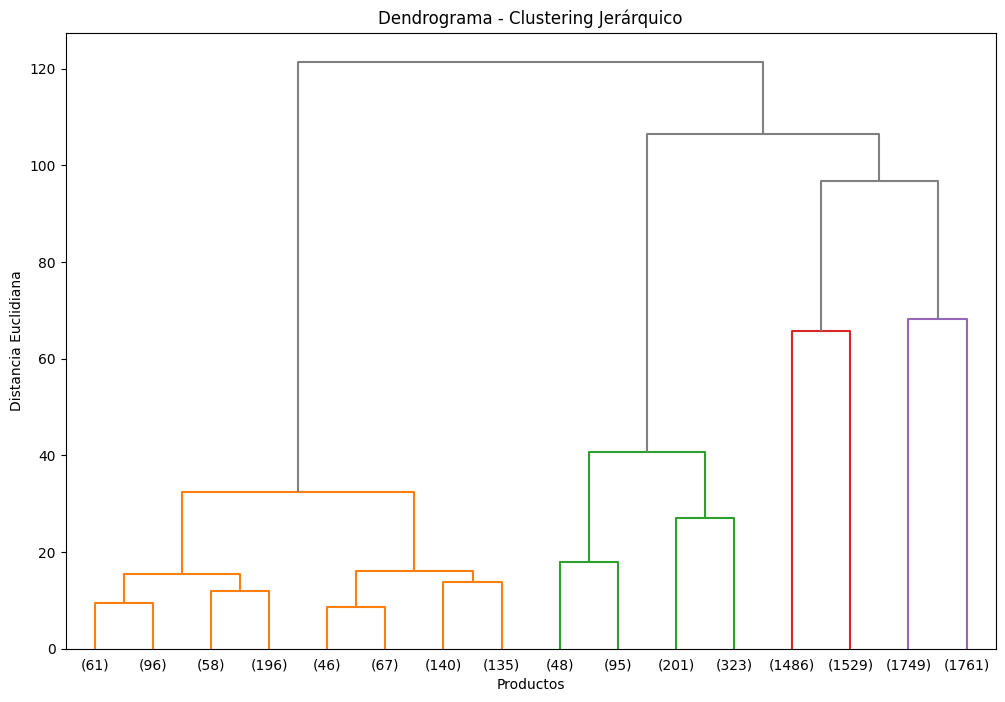

C:\Users\PC\AppData\Local\Temp\ipykernel_964\45347918.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Cluster_Hierarchical'] = fcluster(linkage_matrix, num_clusters_hierarchical, criterion='maxclust')


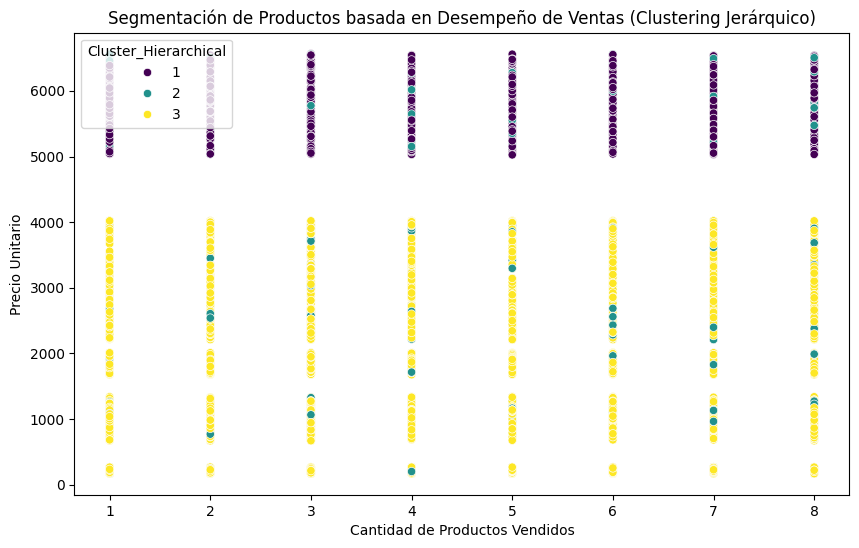

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:\\Users\\PC\\Documents\\US_Regional_Sales_Data.csv')

# Seleccionar las características para la segmentación
features = ['Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price']

# Limpiar las columnas numéricas y convertirlas a números
numeric_columns = ['Discount Applied', 'Unit Cost', 'Unit Price']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True), errors='coerce')

# Eliminar filas con valores nulos resultantes de la conversión
df = df.dropna(subset=numeric_columns)

# Crear un subconjunto del DataFrame con las características seleccionadas
product_data = df[features]

# Estandarizar las características para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_data)

# Aplicar Clustering Jerárquico
linkage_matrix = linkage(product_data_scaled, method='ward', metric='euclidean')

# Graficar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_font_size=10, above_threshold_color='gray')
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Productos')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Seleccionar un número de clústeres basado en el dendrograma (en este caso, supongamos que son 3)
num_clusters_hierarchical = 3

# Asignar clústeres basados en el número seleccionado
product_data['Cluster_Hierarchical'] = fcluster(linkage_matrix, num_clusters_hierarchical, criterion='maxclust')

# Visualizar la segmentación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Quantity', y='Unit Price', hue='Cluster_Hierarchical', data=product_data, palette='viridis')
plt.title('Segmentación de Productos basada en Desempeño de Ventas (Clustering Jerárquico)')
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Precio Unitario')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_964\600974043.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Cluster_DBSCAN'] = dbscan.fit_predict(product_data_scaled)


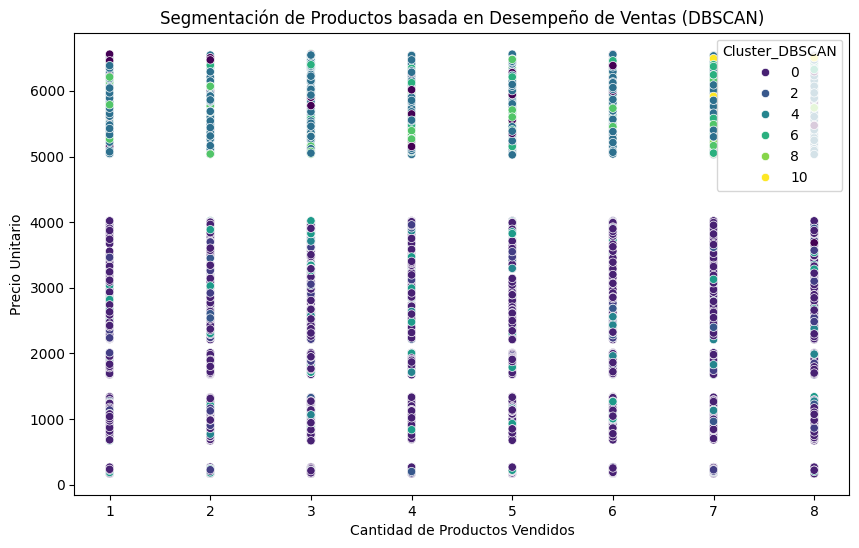

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df = pd.read_csv('C:\\Users\\PC\\Documents\\US_Regional_Sales_Data.csv')

# Seleccionar las características para la segmentación
features = ['Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price']

# Limpiar las columnas numéricas y convertirlas a números
numeric_columns = ['Discount Applied', 'Unit Cost', 'Unit Price']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True), errors='coerce')

# Eliminar filas con valores nulos resultantes de la conversión
df = df.dropna(subset=numeric_columns)

# Crear un subconjunto del DataFrame con las características seleccionadas
product_data = df[features]

# Estandarizar las características para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_data)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar estos parámetros según tus necesidades
product_data['Cluster_DBSCAN'] = dbscan.fit_predict(product_data_scaled)

# Visualizar la segmentación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Quantity', y='Unit Price', hue='Cluster_DBSCAN', data=product_data, palette='viridis')
plt.title('Segmentación de Productos basada en Desempeño de Ventas (DBSCAN)')
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Precio Unitario')
plt.show()
